In [1]:
import numpy as np # 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import pandas as pd  # 'Pandas' is used for data manipulation and analysis
import seaborn as sns # 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import matplotlib.pyplot as plt # 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
%matplotlib inline
import warnings # suppress display of warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
d_int=list(data.select_dtypes(int).columns)
d_int

['anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [32]:
d_float=list(data.select_dtypes(float).columns)
d_float

['age', 'platelets', 'serum_creatinine']

In [9]:
for columns in d_int:
    print (f'{columns}:{data[columns].unique()}')

anaemia:[0 1]
creatinine_phosphokinase:[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334 2442  776
  196  835 3966  171  198   95 1419  478  176  395   99  145  104 1896
  151  244   62  121  418  167 1211 1767  308   97   64  101  212 2281
  972  131  135 1202  427 1021  118   86  675   57 2794   56  211  166
   93  707  119  232  720  180   90 1185 2017  624  207 2522  572  245
   88  446  191  326  655  258  298 11

In [10]:
for columns in d_float:
    print (f'{columns}:{data[columns].unique()}')

age:[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
platelets:[265000.   263358.03 162000.   210000.   327000.   204000.   127000.
 454000.   388000.   368000.   253000.   136000.   276000.   427000.
  47000.   262000.   166000.   237000.    87000.   297000.   289000.
 149000.   196000.   284000.   153000.   200000.   360000.   319000.
 302000.   188000.   228000.   226000.   321000.   305000.   329000.
 185000.   218000.   194000.   310000.   271000.   451000.   140000.
 395000.   418000.   351000.   255000.   461000.   223000.   216000.
 254000.   390000.   385000.   119000.   213000.   274000.   244000.
 497000.   374000.   122000.   243000.   266000.   317000.   283000.
 324000.   293000.   172000.   406000.   1

### EDA

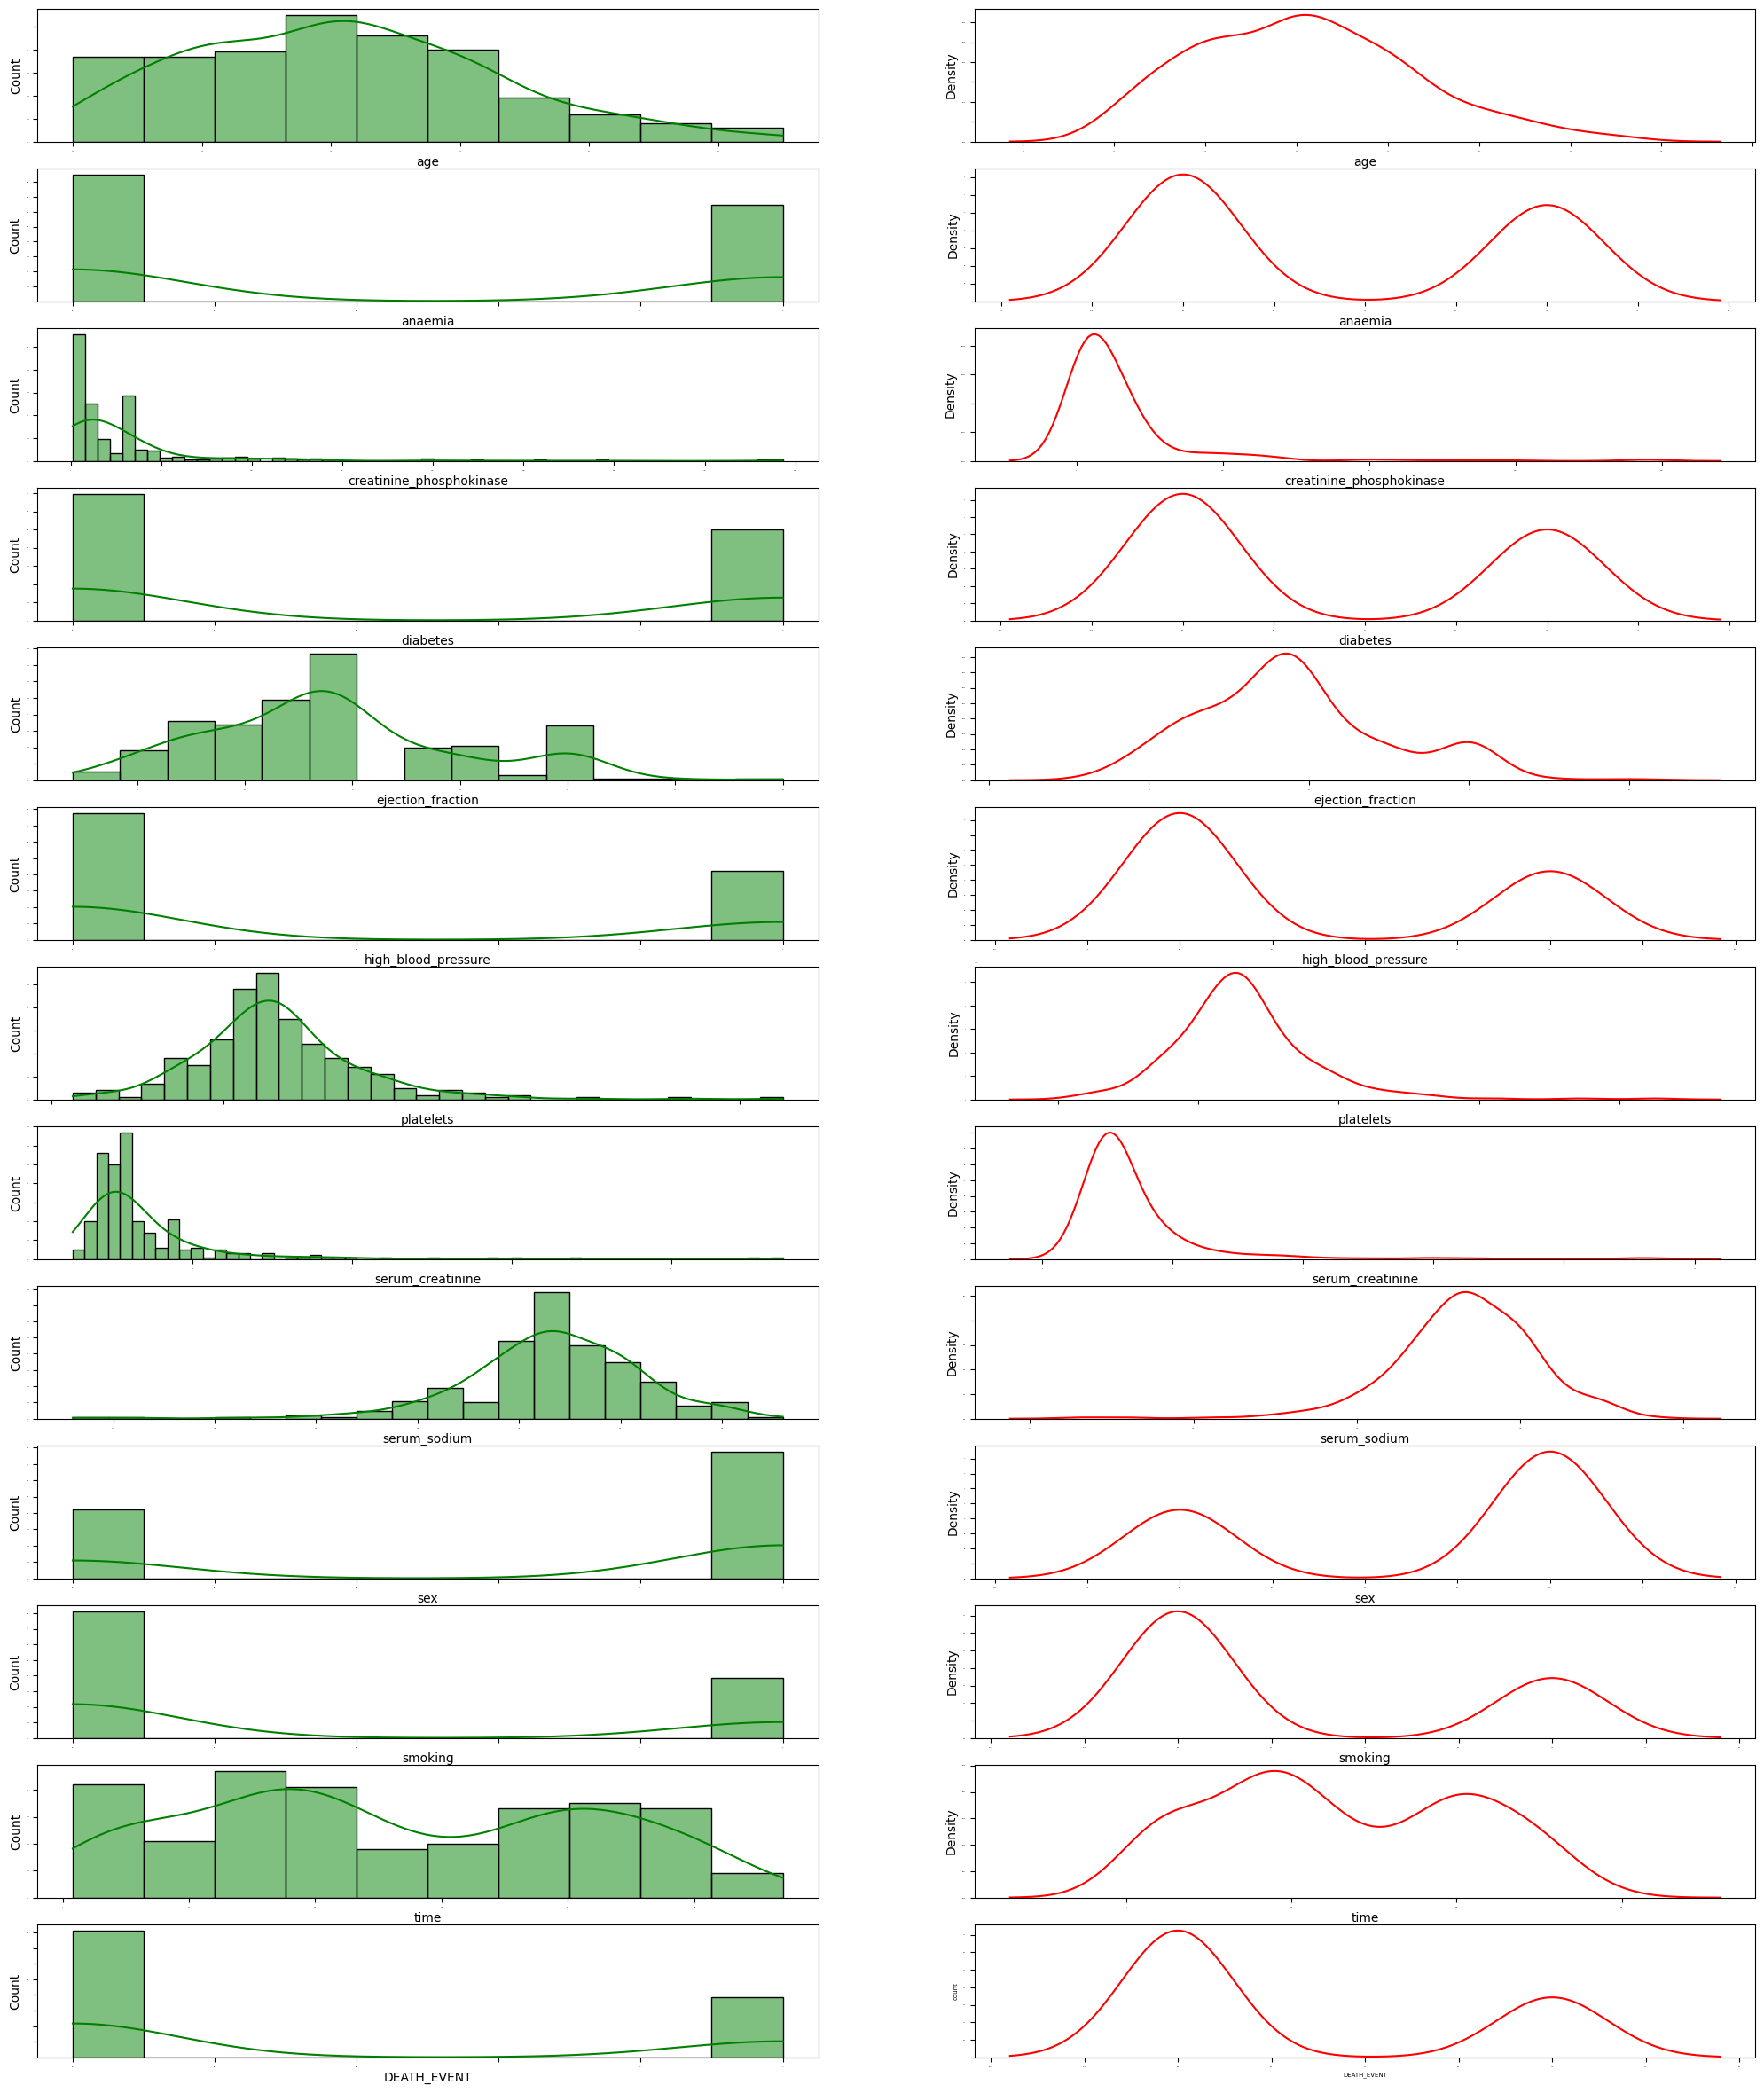

In [38]:
fig,ax=plt.subplots(13,2,figsize=(25,30))
m,n=0,0

for col in data:
    sns.histplot(data[col],kde=True,color='g',ax=ax[m][n])
    sns.distplot(data[col],hist=False,color='r',ax=ax[m][n+1])
    plt.xlabel(col,fontsize=5)
    plt.ylabel('count',fontsize=5)
    plt.rc('xtick', labelsize=1)
    plt.rc('ytick', labelsize=1)
    m+=1

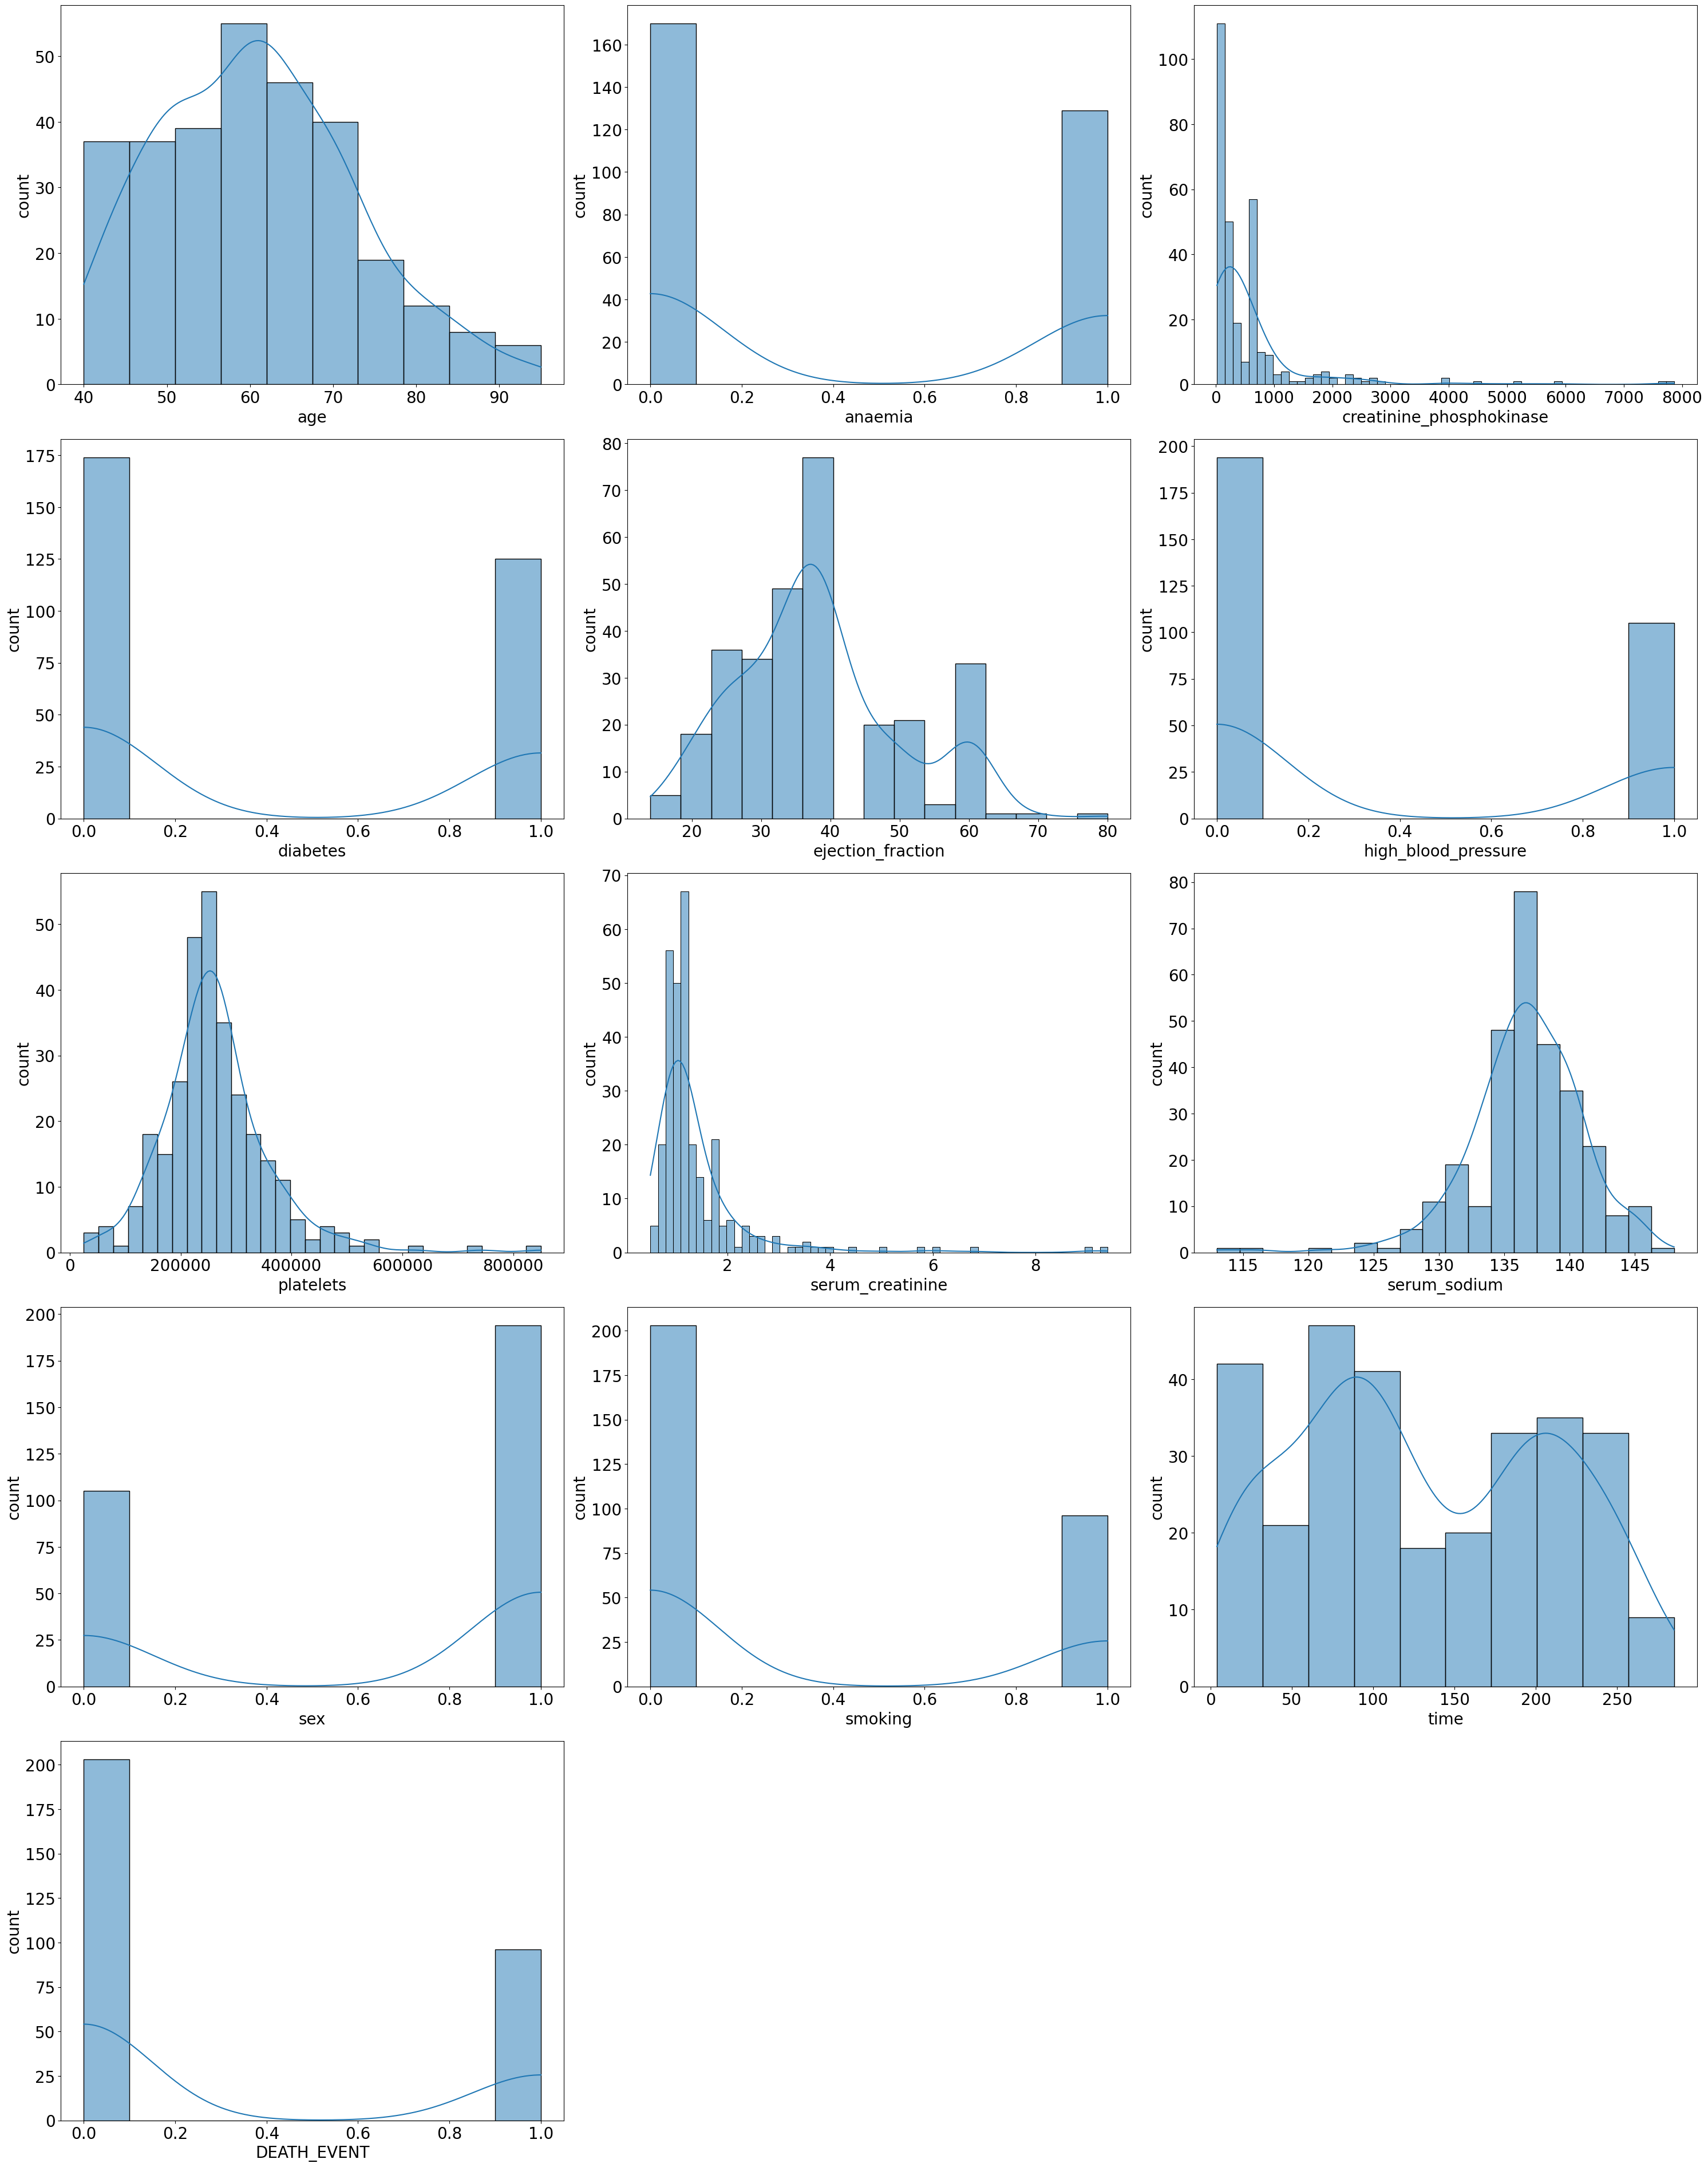

In [34]:
plt.figure(figsize=(30,60))
plt_num=1

for col in data:
    if plt_num<=23:
        ax=plt.subplot(8,3,plt_num)

        ax=sns.histplot(x=data[col],data=data,kde=True)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
        plt.rc('xtick', labelsize=20)
        plt.rc('ytick', labelsize=20)
        plt_num+=1

plt.tight_layout()


<Axes: xlabel='age', ylabel='Count'>

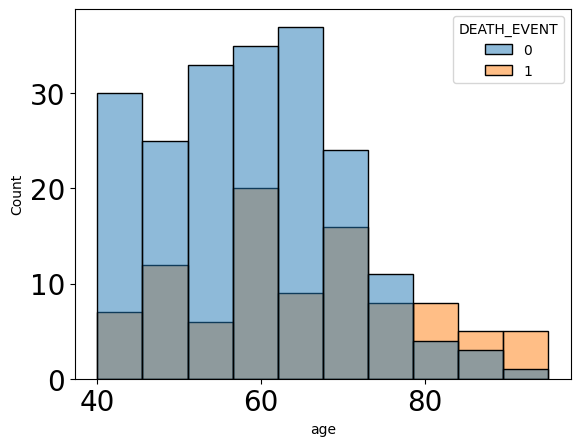

In [60]:
sns.histplot(x='age',data=data,hue=data['DEATH_EVENT'])

In [40]:
data['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

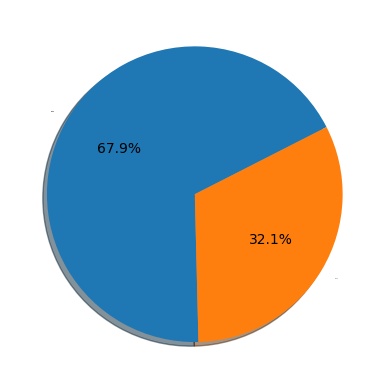

In [47]:
Death_events=['Death','Alive']
value=[203,96]
plt.pie(value,startangle=27,shadow=True,autopct='%2.1f%%', labels=Death_events)
plt.show()

In [48]:
# 67.9 is the death percentage and 32.1 lived percentage 

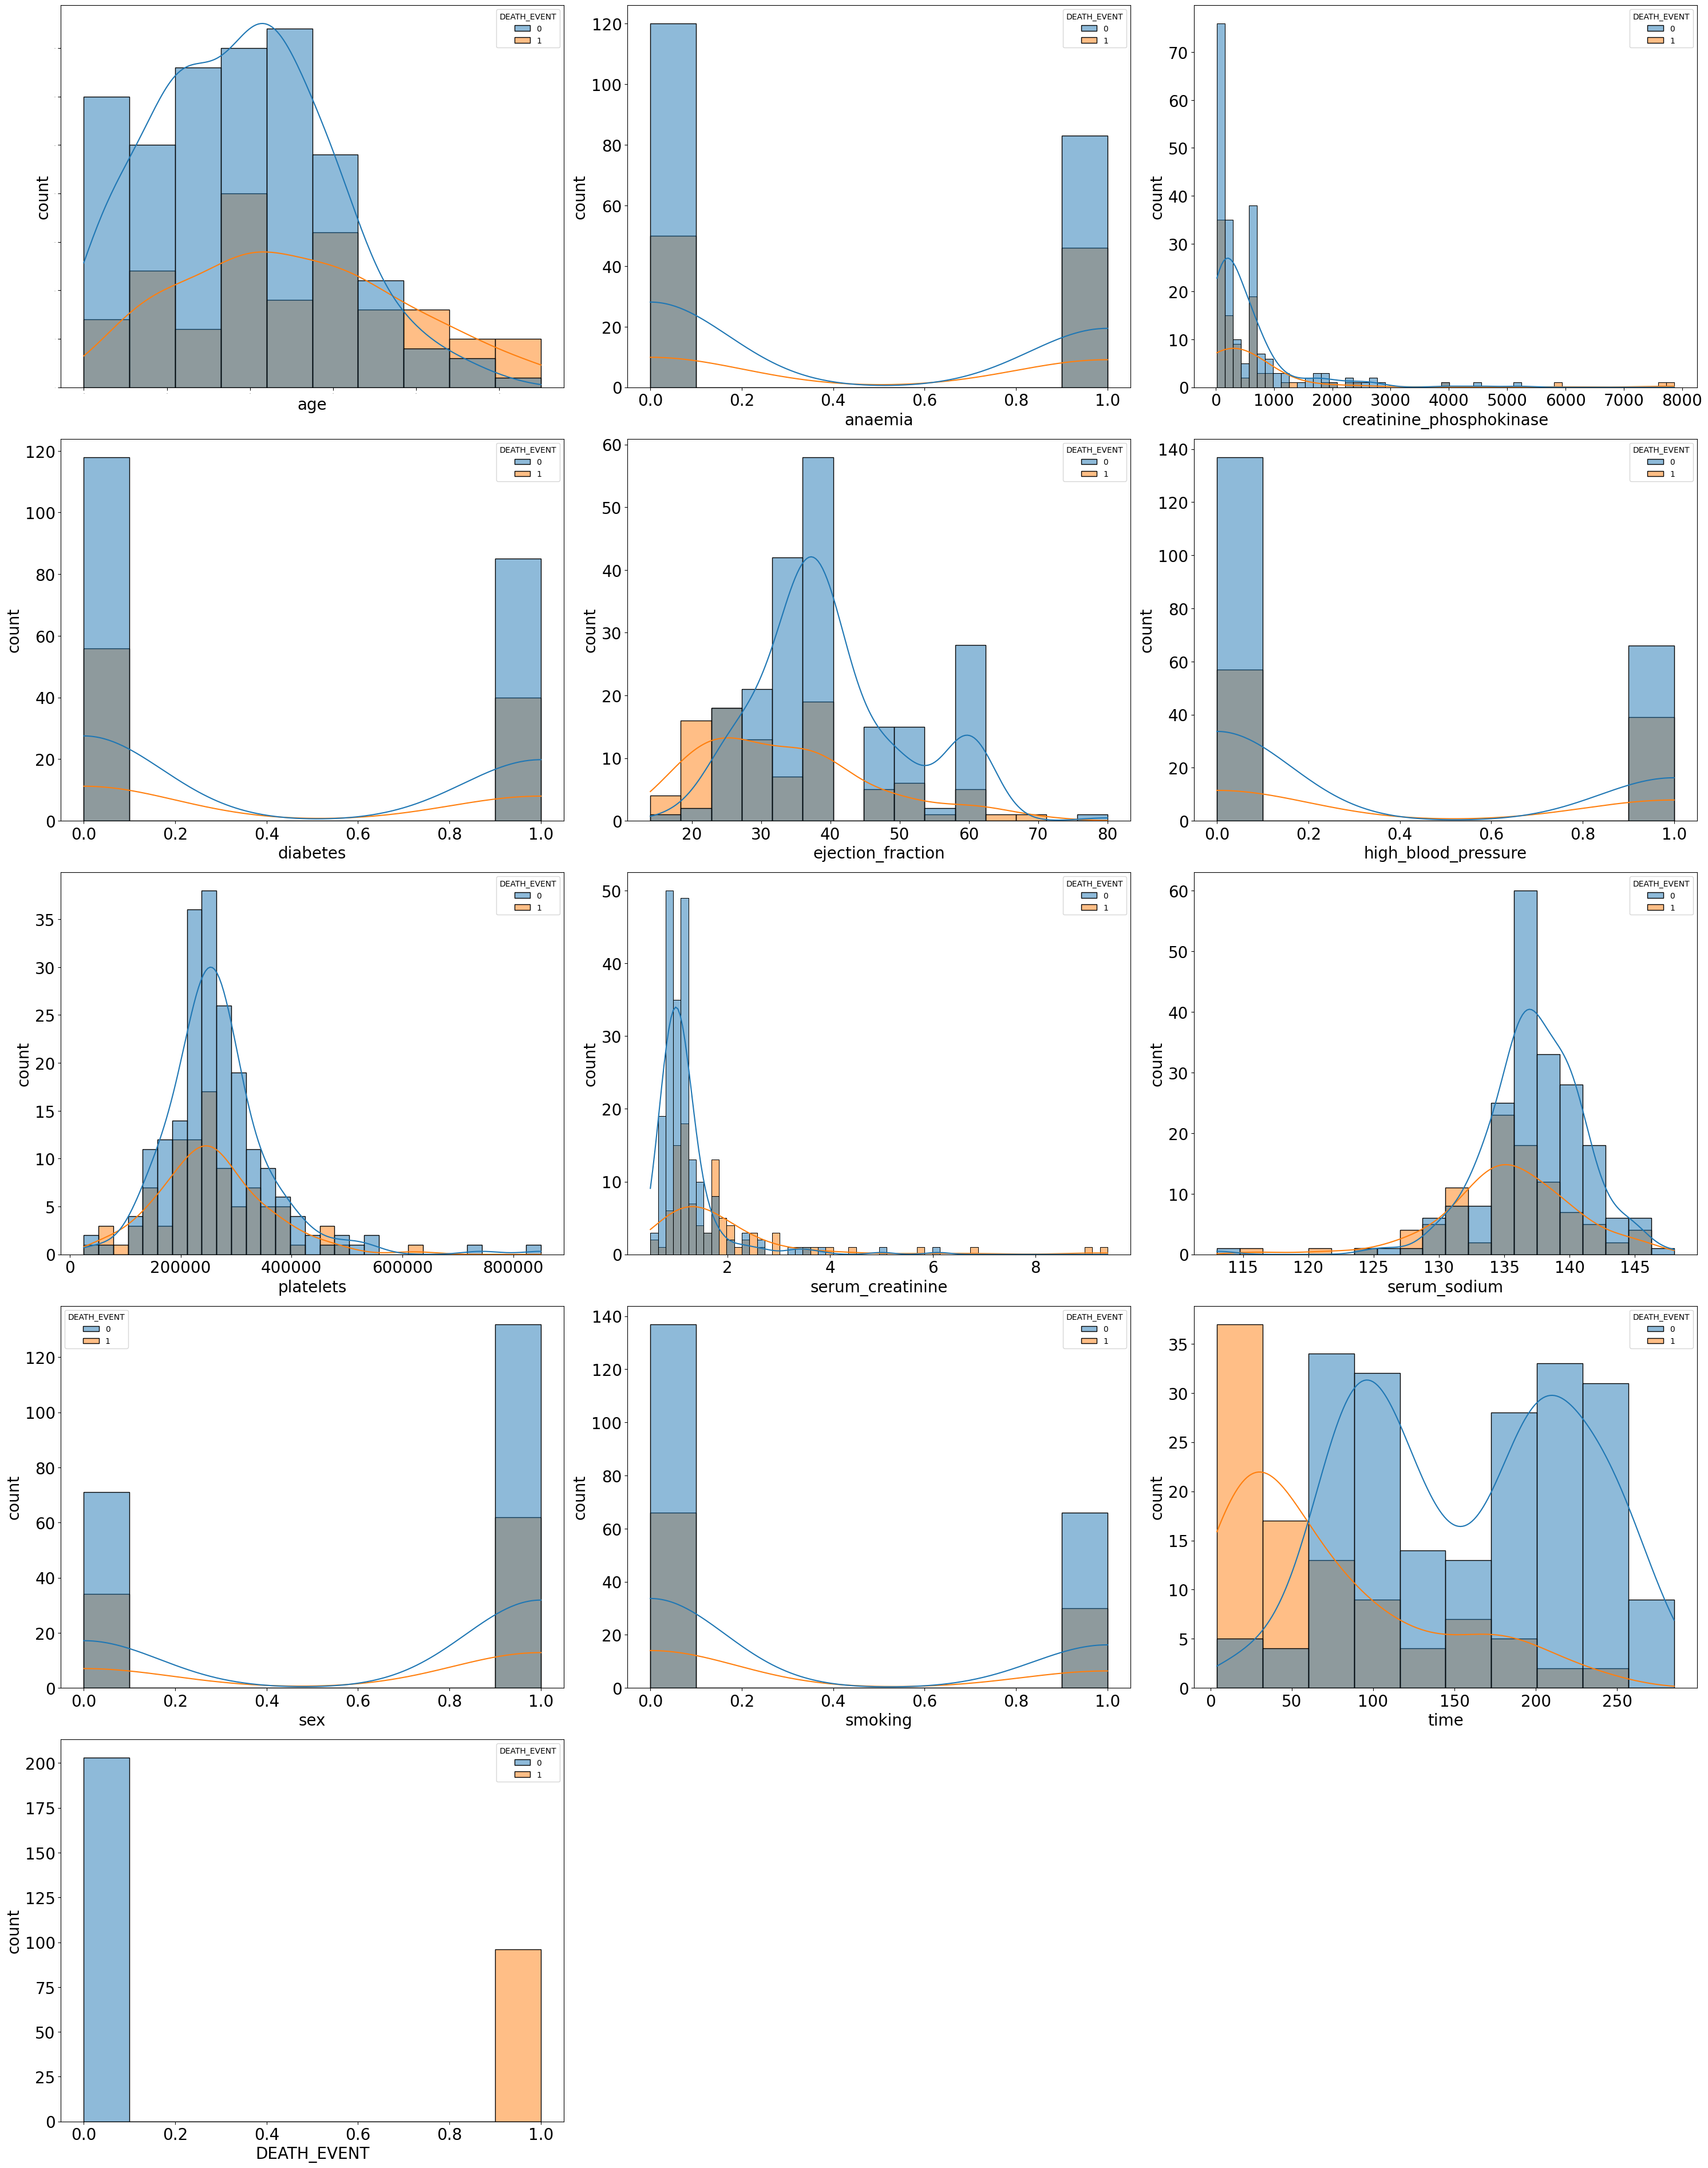

In [49]:
plt.figure(figsize=(30,60))
plt_num=1

for col in data:
    if plt_num<=23:
        ax=plt.subplot(8,3,plt_num)

        ax=sns.histplot(x=data[col],data=data,kde=True,hue=data['DEATH_EVENT'])
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
        plt.rc('xtick', labelsize=20)
        plt.rc('ytick', labelsize=20)
        plt_num+=1

plt.tight_layout()

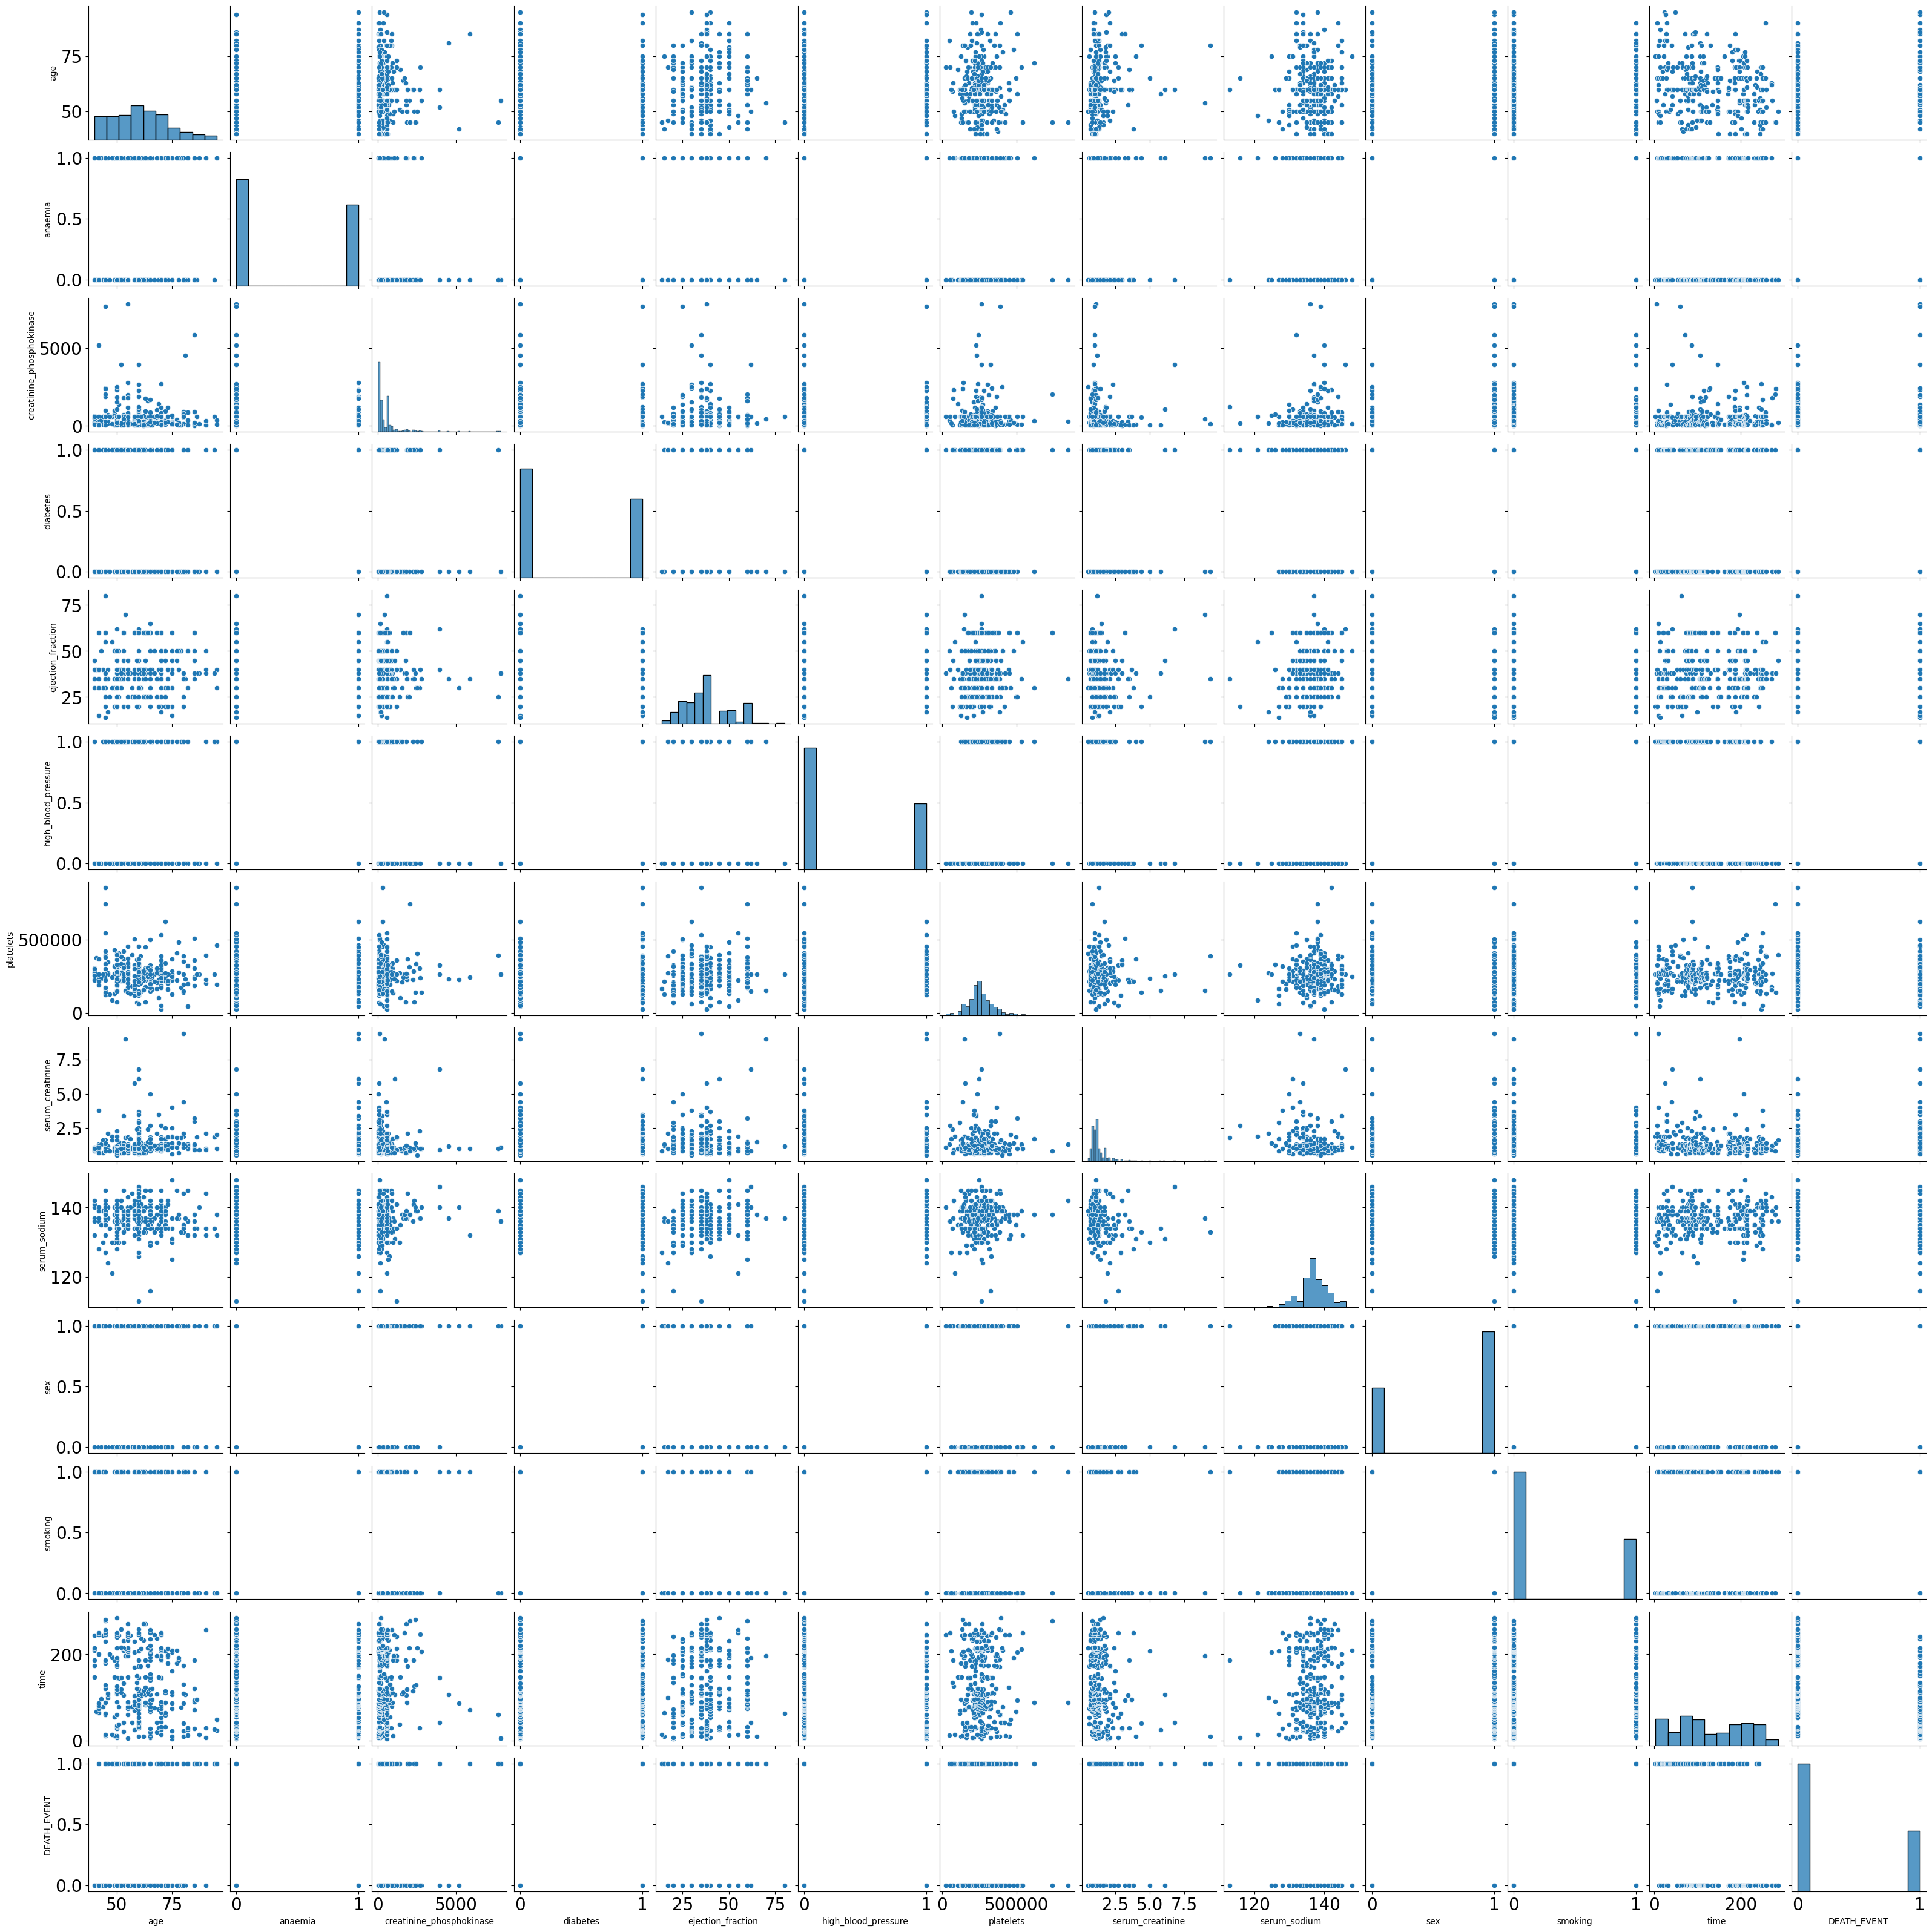

In [51]:
sns.pairplot(data=data)

### Null value

In [52]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [53]:
# no null value

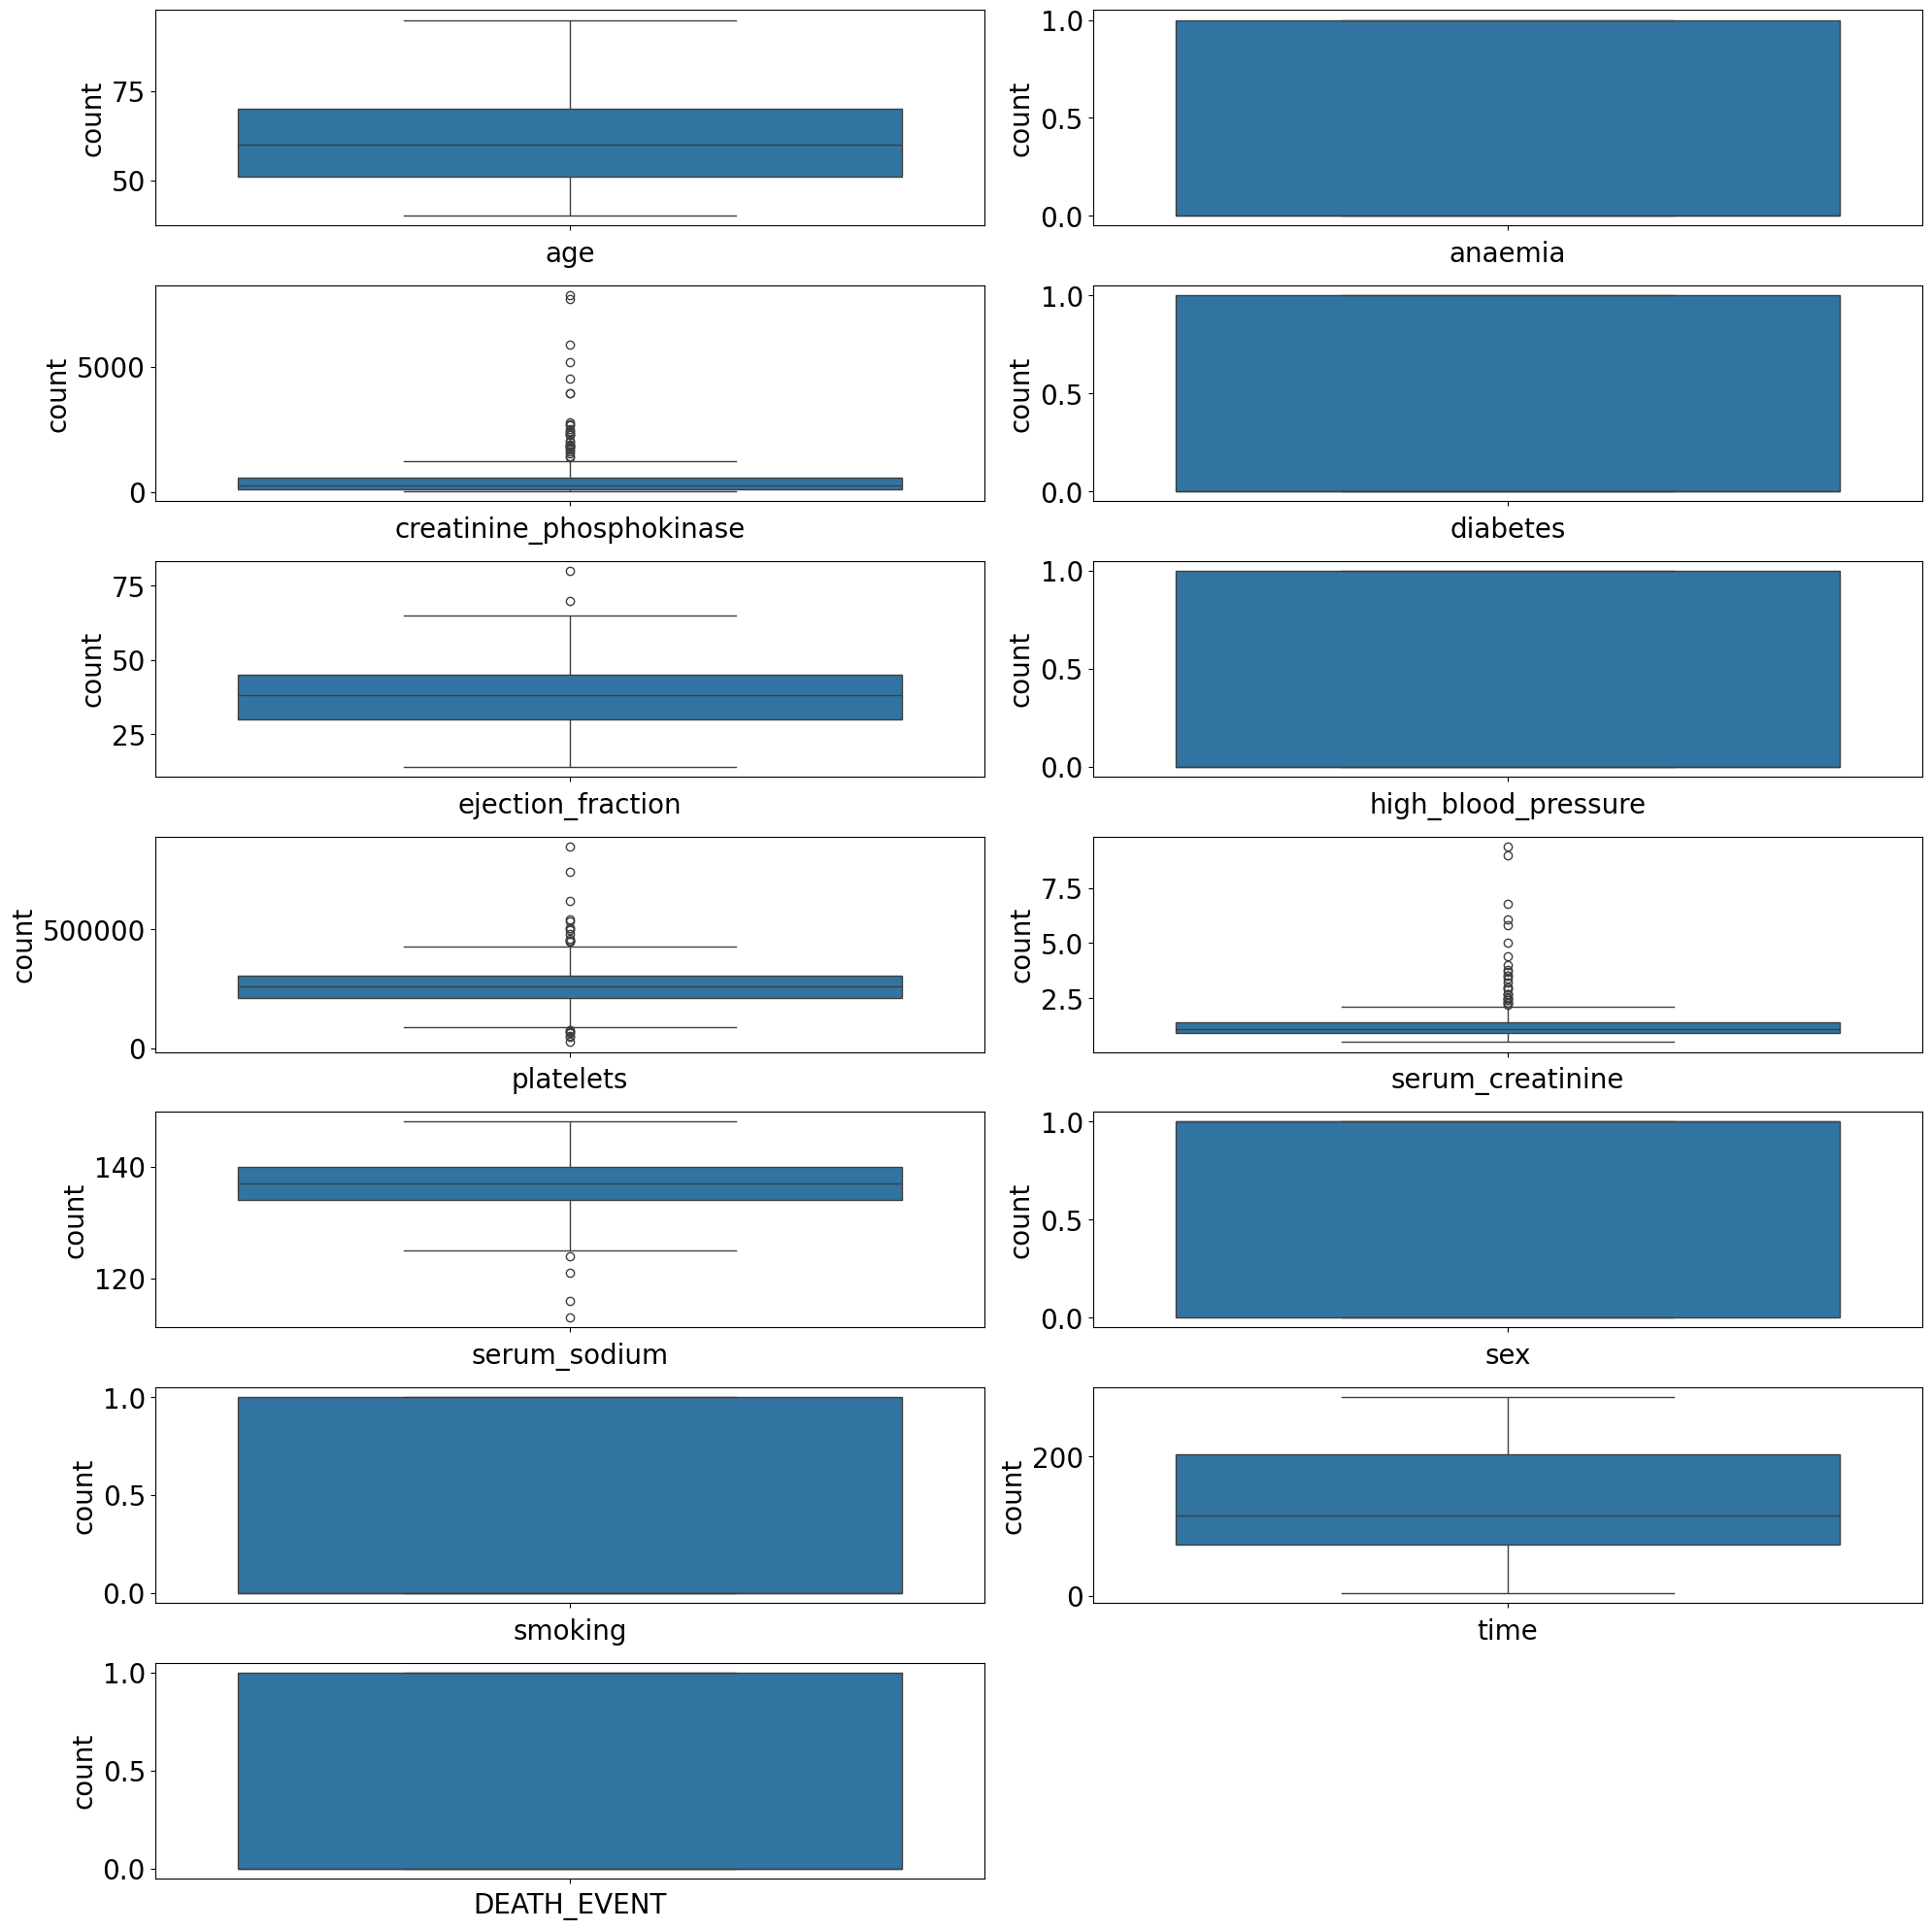

In [54]:
plt.figure(figsize=(20,20))
plot=1
for col in data:
    if plot<=13:
        ax=plt.subplot(7,2,plot)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plot+=1
plt.tight_layout()

In [85]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]=mn.fit_transform(data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']])

### Feature Selection

In [86]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


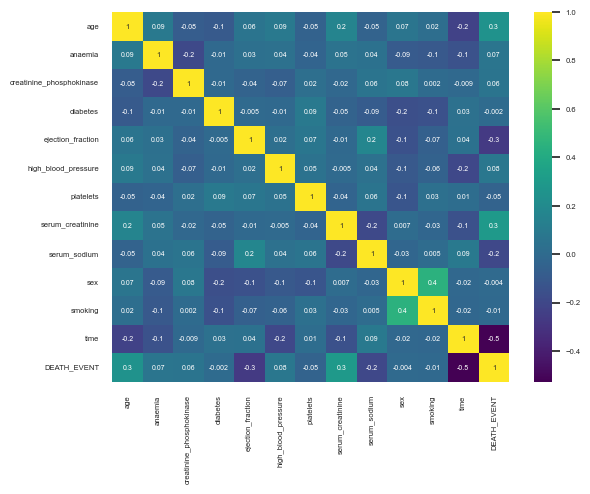

In [87]:
sns.heatmap(data.corr(), annot=True,  fmt='.1g',cmap="viridis",annot_kws={"size": 5})
sns.set(font_scale=0.5)
plt.show()

In [90]:
x=data.drop('DEATH_EVENT',axis=1)
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206


In [91]:
y=data['DEATH_EVENT']

In [73]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/10.6 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.6 MB 980.4 kB/s eta 0:00:11
    --------------------------------------- 0.2/10.6 MB 981.9 kB/s eta 0:00:11
    --------------------------------------- 0.2/10.6 MB 981.9 kB/s eta 0:00:11
   - -------------------------------------- 0.3/10.6 MB 850.6 kB/s eta 0:00:13
   - -------------------------------------- 0.3/10.6 MB 770.1 kB/s eta 0:00:14
   - -------------------------------------- 0.3/10.6 MB 770.1 kB/s eta 0:00:14
   - -------------------------------------- 0.3/10.6 MB 655.5 kB/s eta 0:00:16
   - -------------------------------------- 0.3/10.6 MB 655.5 kB/s eta 0:00:16
   - -------------------------------------- 0.3/10.6 MB 655.5 kB/s eta 0:0

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [76]:
!pip install imblearn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   --------- ------------------------------ 61.4/257.7 kB 1.7 MB/s eta 0:00:01
   ---------------------- ----------------- 143.4/257.7 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 1.8 MB/s eta 0:00:00


In [93]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [94]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [95]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 160, 1: 79})
SMOTE Classes Counter({1: 160, 0: 160})


### Logistic Regression 

In [96]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_smote,y_smote)
y_predict=lr.predict(x_test)
y_pred_prob=lr.predict_proba(x_test)
y_pred_prob

array([[0.80693581, 0.19306419],
       [0.91824219, 0.08175781],
       [0.72479611, 0.27520389],
       [0.42798595, 0.57201405],
       [0.60721673, 0.39278327],
       [0.10182694, 0.89817306],
       [0.57441994, 0.42558006],
       [0.55263468, 0.44736532],
       [0.87844259, 0.12155741],
       [0.61002965, 0.38997035],
       [0.36193   , 0.63807   ],
       [0.82195344, 0.17804656],
       [0.11877748, 0.88122252],
       [0.87962574, 0.12037426],
       [0.62956805, 0.37043195],
       [0.87312857, 0.12687143],
       [0.87746695, 0.12253305],
       [0.51260651, 0.48739349],
       [0.48813268, 0.51186732],
       [0.76731609, 0.23268391],
       [0.15040756, 0.84959244],
       [0.60054097, 0.39945903],
       [0.12456823, 0.87543177],
       [0.65980038, 0.34019962],
       [0.27976147, 0.72023853],
       [0.28863385, 0.71136615],
       [0.8280886 , 0.1719114 ],
       [0.83595251, 0.16404749],
       [0.85337503, 0.14662497],
       [0.58283404, 0.41716596],
       [0.

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.67      0.82      0.74        17

    accuracy                           0.83        60
   macro avg       0.79      0.83      0.81        60
weighted avg       0.85      0.83      0.84        60



In [98]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(lr,x,y,cv=10, scoring='accuracy')

In [99]:
print(cross_val.std())

0.0970230014420574


### DecisionTree

In [100]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(x_smote,y_smote)#training the model
y_hat=dt.predict(x_test)#prediction
y_hat

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [101]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.68      0.76      0.72        17

    accuracy                           0.83        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.84      0.83      0.84        60



In [103]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(dt,x,y,cv=10, scoring='accuracy')

In [104]:
print(cross_val.std())

0.15474679816337172


### SVM

In [105]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [106]:
y_hat=svclassifier.predict(x_test)

In [107]:

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.65      0.76      0.70        17

    accuracy                           0.82        60
   macro avg       0.78      0.80      0.79        60
weighted avg       0.83      0.82      0.82        60



In [114]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(svclassifier,x,y,cv=4, scoring='accuracy')

In [115]:
print(cross_val.std())

0.04930652934996787
